In [13]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_excel("University_Clustering.xlsx")

print(df)

            Univ State   SAT  Top10  Accept  SFRatio  Expenses  GradRate
0          Brown    RI  1310     89      22       13     22704        94
1        CalTech    CA  1415    100      25        6     63575        81
2            CMU    PA  1260     62      59        9     25026        72
3       Columbia    NY  1310     76      24       12     31510        88
4        Cornell    NY  1280     83      33       13     21864        90
5      Dartmouth    NH  1340     89      23       10     32162        95
6           Duke    NC  1315     90      30       12     31585        95
7     Georgetown    DC  1255     74      24       12     20126        92
8        Harvard    MA  1400     91      14       11     39525        97
9   JohnsHopkins    MD  1305     75      44        7     58691        87
10           MIT    MA  1380     94      30       10     34870        91
11  Northwestern    IL  1260     85      39       11     28052        89
12     NotreDame    IN  1255     81      42       1

In [15]:
df.drop("State",axis=1, inplace=True)

In [16]:
df.shape

(25, 7)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [18]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [19]:
df_new = df.drop("Univ", axis=1)

In [20]:
from sklearn.preprocessing import StandardScaler

In [22]:
for col in df_new:
    ss = StandardScaler()
    df_new[col]= ss.fit_transform(df_new[[col]])

In [23]:
df_new.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


In [26]:
# kmeans
wcss = []
clusters = list(range(1,9))

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(df_new)
    wcss.append(model.inertia_)

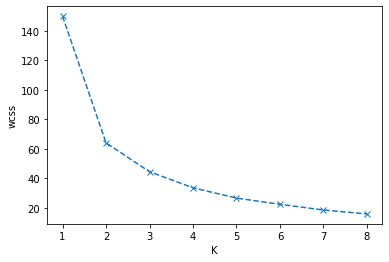

In [29]:
# elbow
plt.figure()
plt.plot(clusters,wcss,"x--")
plt.xlabel("K")
plt.ylabel("wcss")
plt.show()

In [30]:
# final model
final_model = KMeans(n_clusters=3)
final_model.fit(df_new)

KMeans(n_clusters=3)

In [33]:
final_model.labels_

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2])

In [34]:
df["labels"] = final_model.labels_

In [35]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0


In [36]:
df.groupby("labels").mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
labels,,,,,,
0,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222


In [38]:
df[df["labels"]==0]["Univ"]

0            Brown
2              CMU
3         Columbia
4          Cornell
7       Georgetown
11    Northwestern
12       NotreDame
18      UCBerkeley
19        UChicago
20       UMichigan
21           UPenn
22             UVA
Name: Univ, dtype: object

In [39]:
df[df["labels"]==1]["Univ"]

13     PennState
15        Purdue
17      TexasA&M
23    UWisconsin
Name: Univ, dtype: object

In [40]:
df[df["labels"]==2]["Univ"]

1          CalTech
5        Dartmouth
6             Duke
8          Harvard
9     JohnsHopkins
10             MIT
14       Princeton
16        Stanford
24            Yale
Name: Univ, dtype: object